In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import os

os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


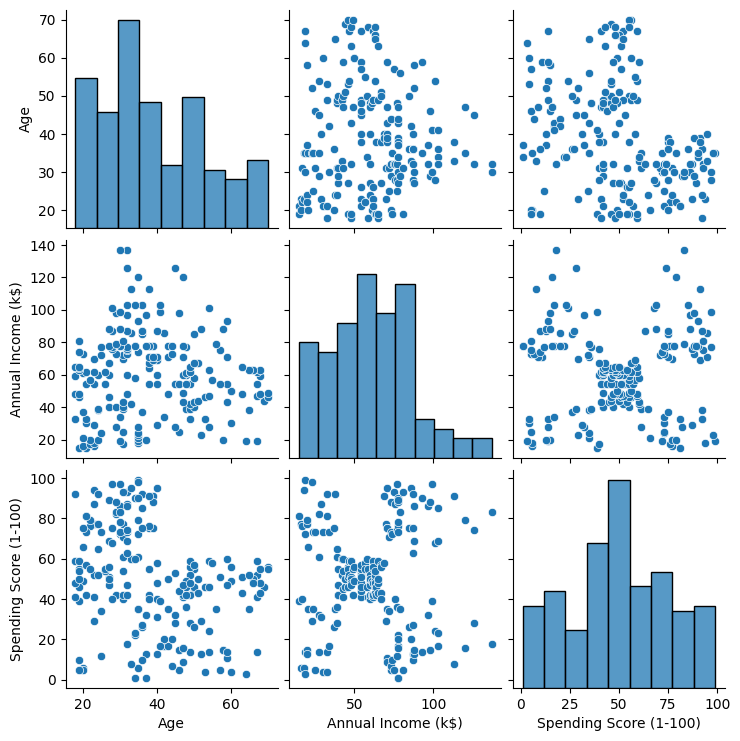

In [5]:
sns.pairplot(dataset.iloc[:,[2,3,4]])

In [6]:
from sklearn.preprocessing import StandardScaler

X = dataset.iloc[:,[3,4]].values

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

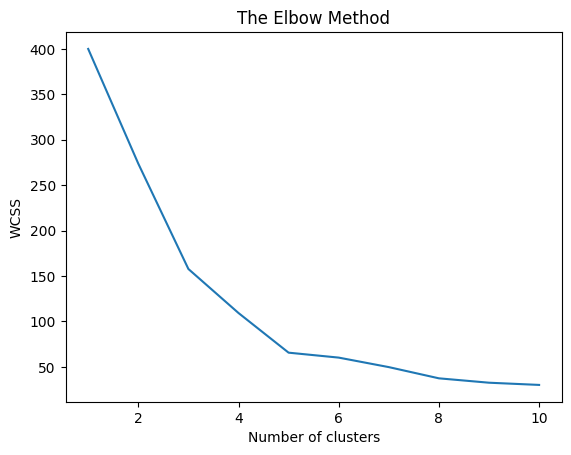

In [7]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
kmeans = KMeans(n_clusters = 5, init='k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

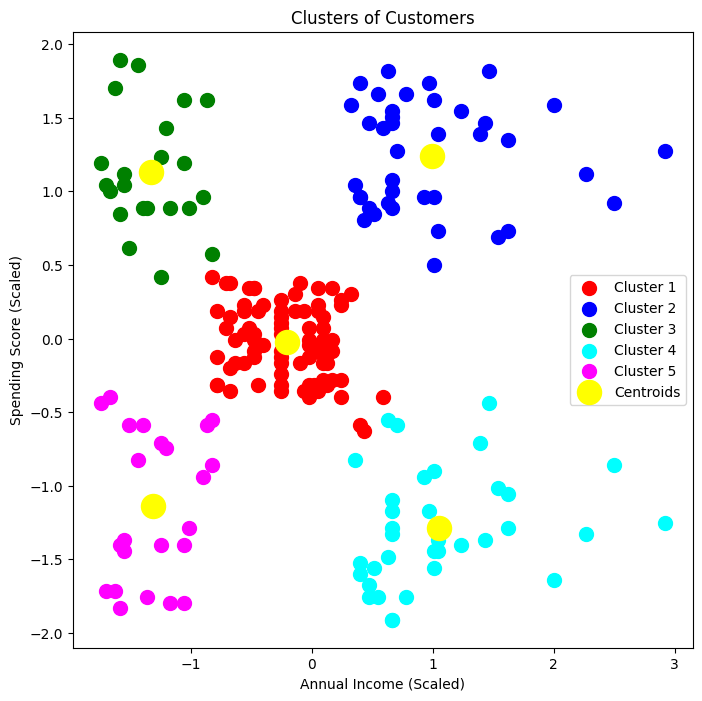

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 300, c = 'yellow', label= "Centroids")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (Scaled)")
plt.ylabel("Spending Score (Scaled)")
plt.legend()
plt.show()

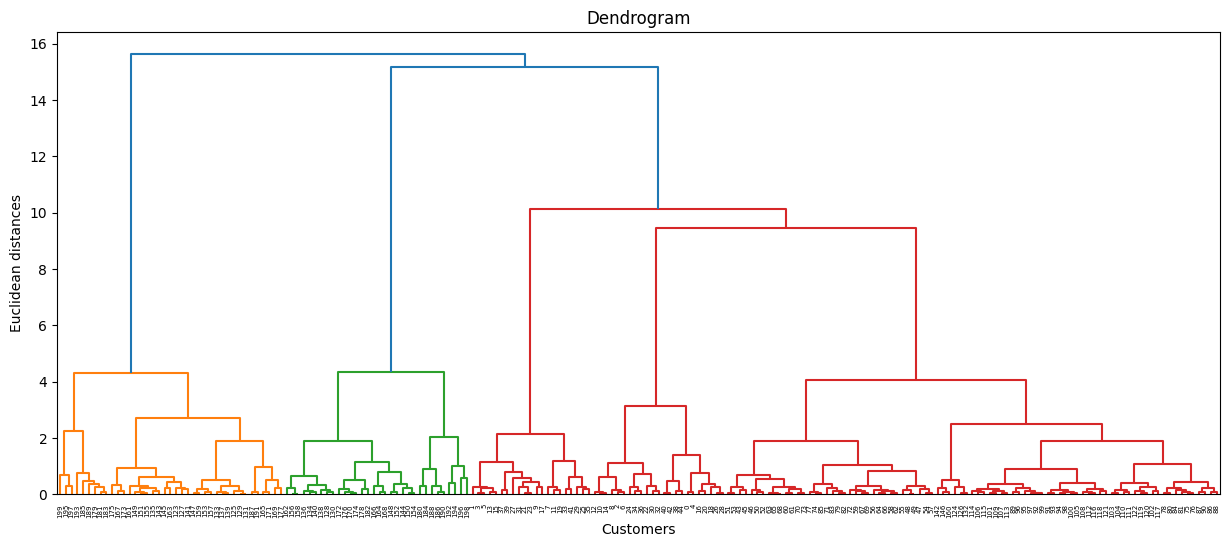

In [10]:
import  scipy.cluster.hierarchy as sch

plt.figure(figsize = (15,6))
dendrogram = sch.dendrogram(sch.linkage(X, method= 'ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = "euclidean", linkage = 'ward')
y_hc = hc.fit_predict(X)

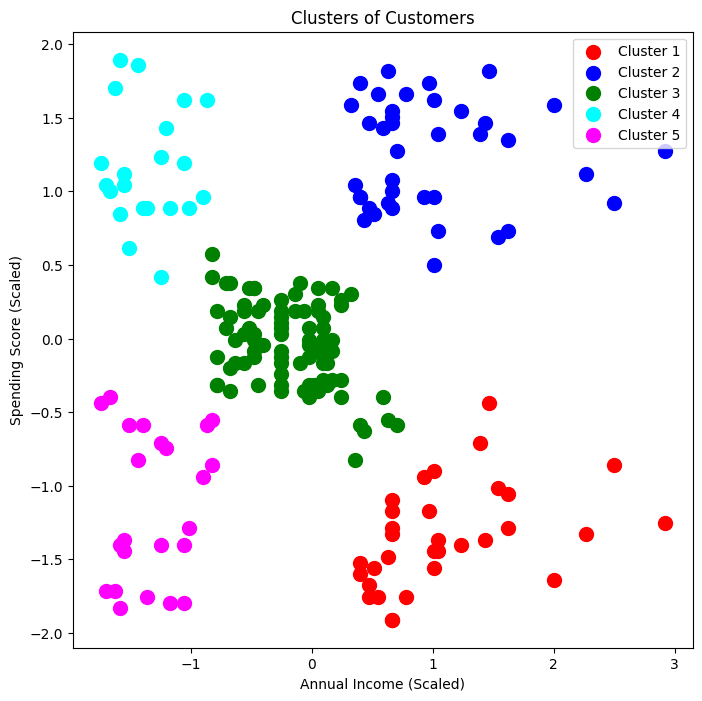

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0,0], X[y_hc == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1,0], X[y_hc == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2,0], X[y_hc == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3,0], X[y_hc == 3,1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4,0], X[y_hc == 4,1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.title("Clusters of Customers")
plt.xlabel("Annual Income (Scaled)")
plt.ylabel("Spending Score (Scaled)")
plt.legend()
plt.show()

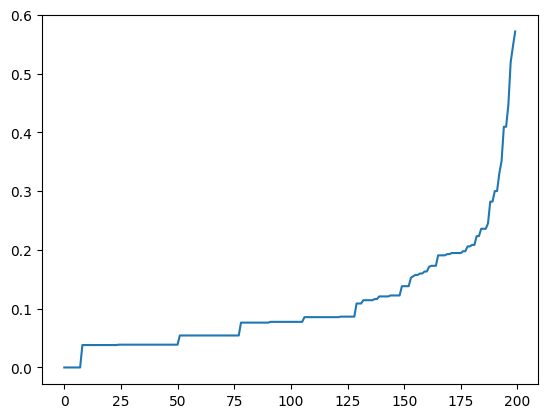

In [13]:
from sklearn.neighbors import NearestNeighbors

neighbours = NearestNeighbors (n_neighbors = 2)
distances, indices = neighbours.fit(X).kneighbors(X)

distances = distances[:,1]
distances = np.sort(distances, axis=0)
plt.plot(distances)

In [14]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.25, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

In [15]:
y_dbscan

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  1,
        0,  1, -1,  1,  0, -1,  0, -1, -1,  1, -1,  1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1,  2, -1,  2,  2, -1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3, -1, -1,  5,  3, -1, -1,
        5, -1,  5,  3,  5,  3,  5, -1,  5,  3, -1,  3,  5,  3, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

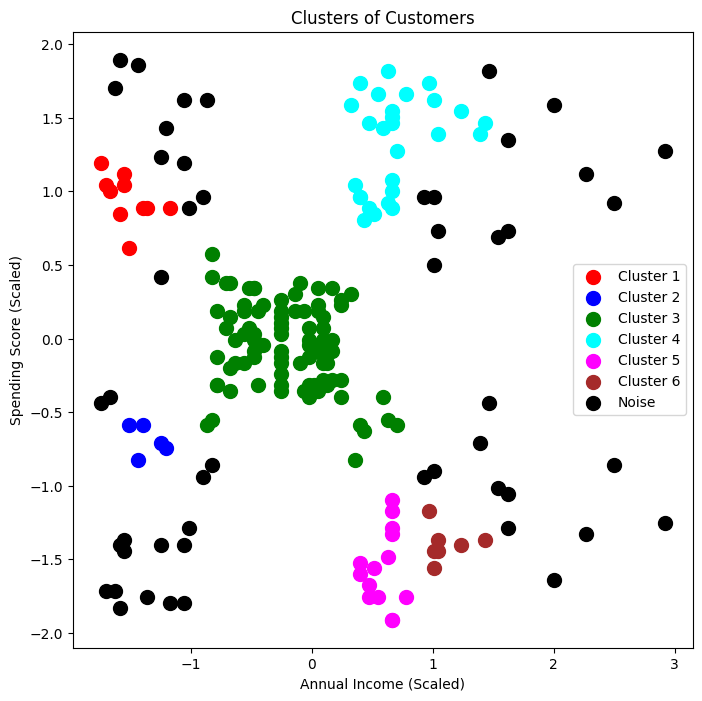

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_dbscan == 0,0], X[y_dbscan == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_dbscan == 1,0], X[y_dbscan == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_dbscan == 2,0], X[y_dbscan == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_dbscan == 3,0], X[y_dbscan == 3,1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_dbscan == 4,0], X[y_dbscan == 4,1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_dbscan == 5,0], X[y_dbscan == 5,1], s = 100, c = 'brown', label = 'Cluster 6')
plt.scatter(X[y_dbscan == -1,0], X[y_dbscan == -1,1], s = 100, c = 'black', label = 'Noise')

plt.title("Clusters of Customers")
plt.xlabel("Annual Income (Scaled)")
plt.ylabel("Spending Score (Scaled)")
plt.legend()
plt.show()

In [17]:
financials = pd.read_csv("costpercompany.csv")
financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       29 non-null     object 
 1   surcharges    29 non-null     float64
 2   RoR           29 non-null     float64
 3   dailycost     29 non-null     int64  
 4   costwithload  29 non-null     float64
 5   costofDemand  29 non-null     float64
 6   Sales         29 non-null     int64  
 7   WearandTear   29 non-null     float64
 8   Fcost         29 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 2.2+ KB


In [18]:
financials.head()

,Company,surcharges,RoR,dailycost,costwithload,costofDemand,Sales,WearandTear,Fcost
0,Yashida,2.70,9.36,222,12.1,12.9,32721,12.3,1.908
1,Wisconsin,1.20,11.80,148,59.9,3.5,7287,41.1,0.702
2,Virginia,1.07,9.30,174,54.3,5.9,10093,26.6,1.306
3,United,1.04,8.60,204,61.0,3.5,6650,0.0,2.116
4,Texas,1.16,11.70,104,54.0,-2.1,13507,0.0,0.636


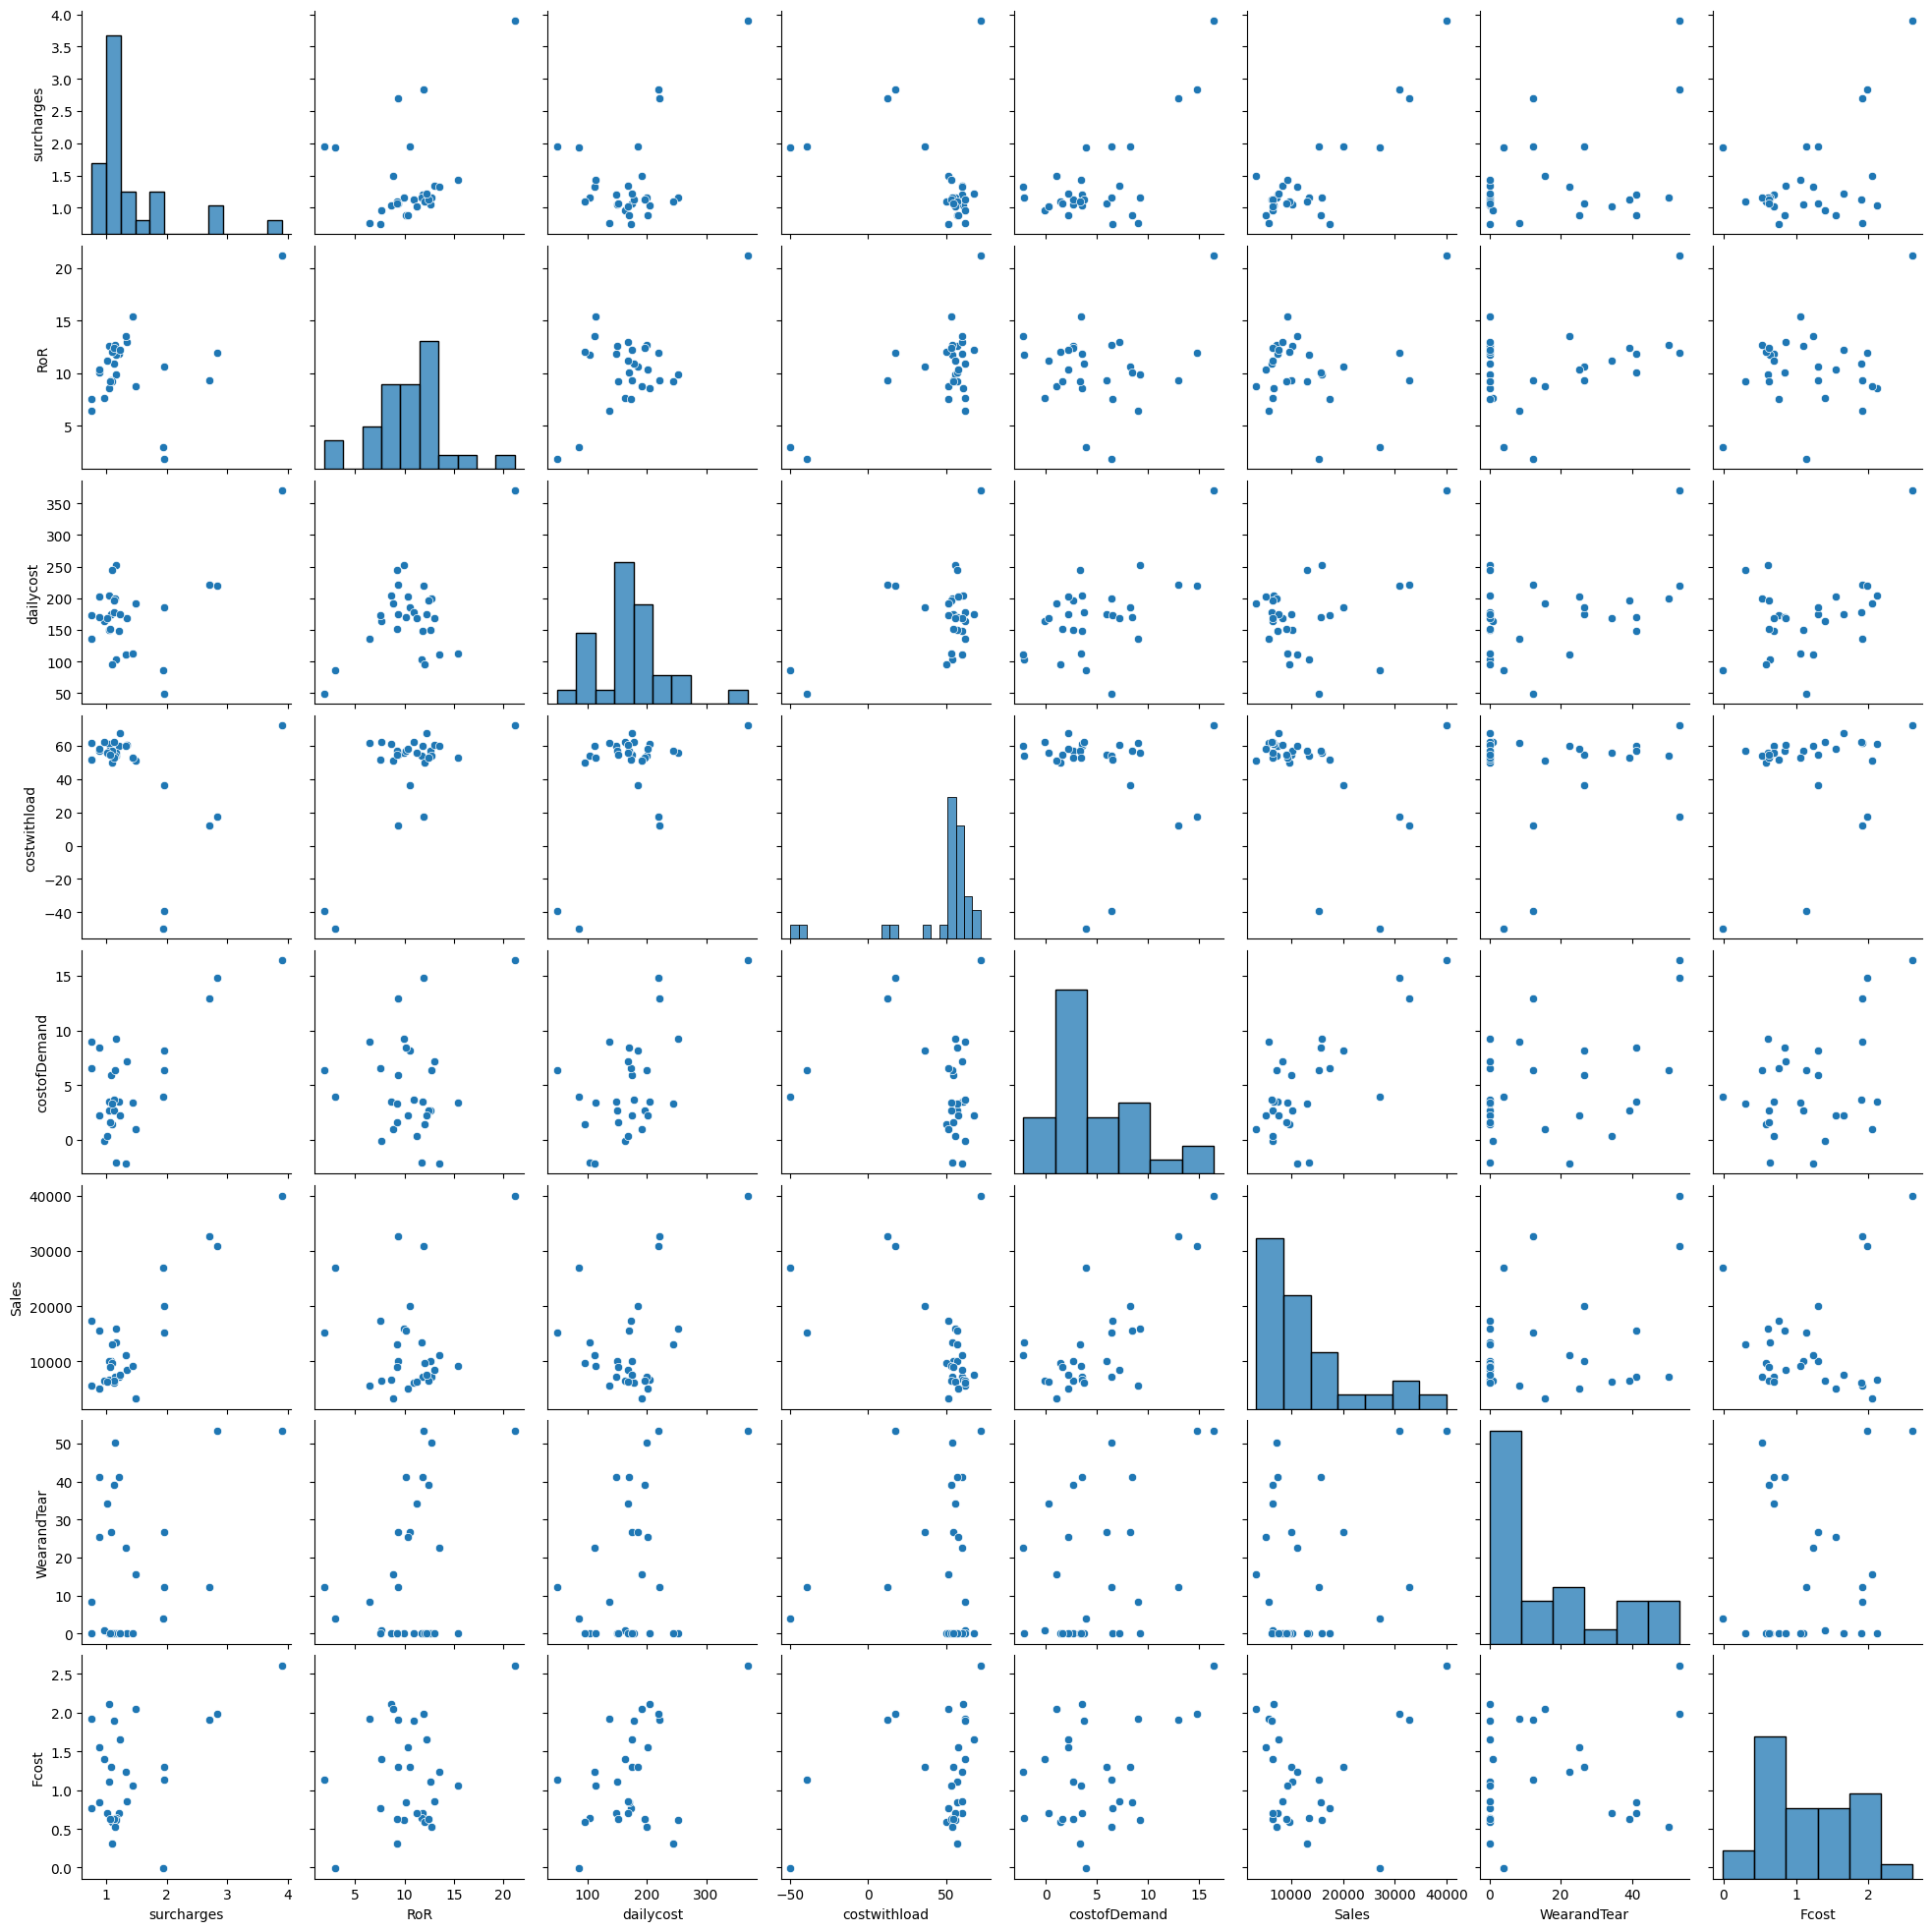

In [19]:
X = financials.iloc[:,1:9]

sns.pairplot(X)

In [20]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

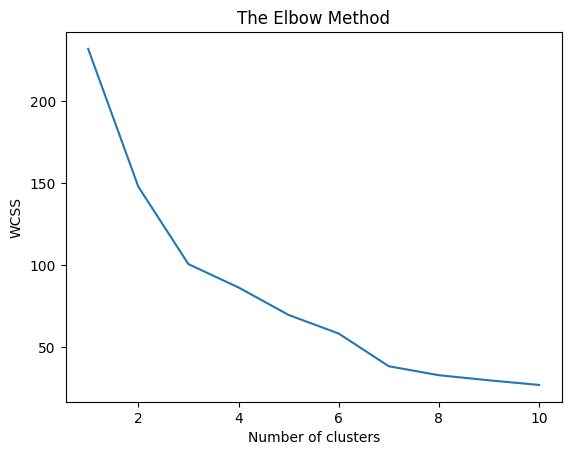

In [21]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init ='k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [22]:
X

array([[ 1.88852661, -0.32235255,  0.8332489 , -1.2515904 ,  1.77905177,
         2.19774632, -0.20533316,  1.17156669],
       [-0.29517641,  0.37433854, -0.41111585,  0.469424  , -0.31313767,
        -0.64019589,  1.34665103, -0.75238379],
       [-0.48443067, -0.3394843 ,  0.02609339,  0.26779888,  0.22103836,
        -0.32710059,  0.5652701 ,  0.21118676],
       [-0.52810473, -0.53935469,  0.53056558,  0.50902893, -0.31313767,
        -0.71127277, -0.86815974,  1.50339231],
       [-0.35340849,  0.34578563, -1.1510084 ,  0.25699753, -1.5595484 ,
         0.05383574, -0.86815974, -0.85767461],
       [-0.51354671,  0.60276185, -0.37748437,  0.35420964, -0.49119635,
        -0.3218563 , -0.86815974, -0.1046857 ],
       [ 0.7966751 ,  0.025993  ,  0.21106653, -0.3910832 ,  0.73295705,
         0.77877521,  0.57065894,  0.20959145],
       [-0.93572929, -1.16751879, -0.61290472,  0.54143297,  0.91101572,
        -0.81571225, -0.42088652,  1.19071048],
       [-0.35340849, -0.16816682

In [23]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.44839294, 0.25725108])

In [25]:
sum(pca.explained_variance_ratio_)

0.7056440181560044

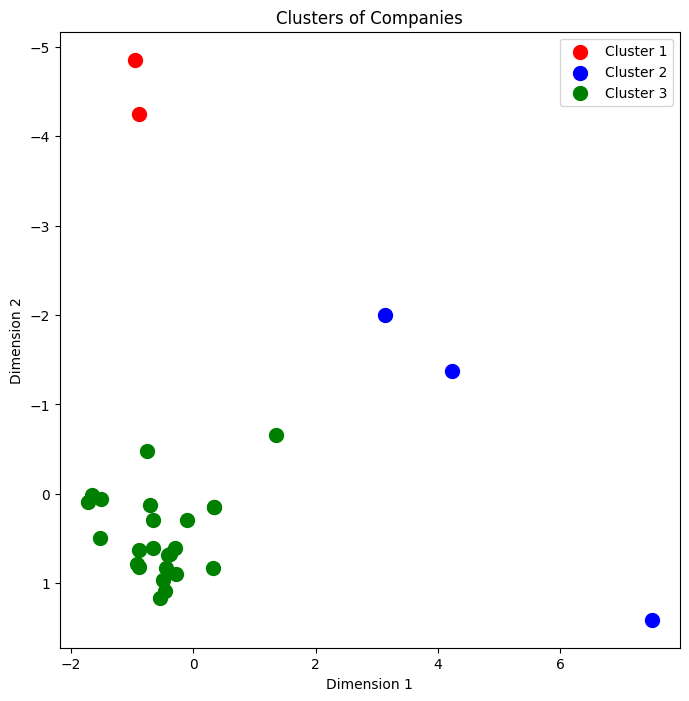

In [26]:
colours = ['red', 'blue', 'green']

plt.figure(figsize = (8,8))
for i in range(3):
    plt.scatter(X_reduced[y_kmeans == i,0], X_reduced[y_kmeans == i,1], s = 100,c = colours[i],
               label = 'Cluster '+ str(i + 1) )
plt.gca().invert_yaxis()

plt.title("Clusters of Companies")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()